In [1]:
import pandas as pd
import math
from random import seed, randint
import matplotlib.pyplot as plt

In [2]:
Kibergrad = pd.read_csv("../Podatki/Kibergrad.csv") # preberem podatke in jih shranim, nato pa še preimenujem stolpce za lažje delo v naprej.

In [3]:
Kibergrad.rename(columns={"'TIP'": "Tip", "'CLANOV'": "Clanov", "'OTROK'": "Otrok", "'DOHODEK'": "Dohodek", "'CETRT'": "Cetrt", "'IZOBRAZBA'": "Izobrazba"}, inplace = True)

In [4]:
Kibergrad["Brez Izobrazbe"] = Kibergrad["Izobrazba"].apply(lambda x: 1 if x < 39 else 0)

In [5]:
Kibergrad.head()

,Tip,Clanov,Otrok,Dohodek,Cetrt,Izobrazba,Brez Izobrazbe
0,1,2,0,43450,1,39,0
1,1,2,0,79000,1,40,0
2,1,2,0,51306,1,39,0
3,1,4,2,24850,1,41,0
4,1,4,2,65145,1,43,0


Naredimo si seznam indeksov, ki nam označujejo katerih 200 (800) vrstic iz strukture Kibergrad smo vzeli v naključno izbran vzorec.

In [6]:
Vzorci200 = []
for i in range(100):
    Vzorec = Kibergrad.sample(200, random_state=i)
    Seznam = Vzorec.index.tolist()
    Vzorci200.append(Seznam)

In [7]:
Vzorci800 = []
for i in range(100):
    Vzorec = Kibergrad.sample(800, random_state=i)
    Seznam = Vzorec.index.tolist()
    Vzorci800.append(Seznam)

In [8]:
N = len(Kibergrad) # število vseh družin v populaciji
n = len(Vzorci200[0]) # število družin v vzorcu - tokrat 200
m = len(Vzorci800[0]) # število družin v vzorcu - tokrat 800

Za vsak nakjlučno izbran vzorec izračunajmo pripadajoč Delež, Standardno Napako in Spodnjo ter zgornjo mejo za 95% interval zaupanja, nato si vse to shranimo v novo strukturo

In [9]:
Podatki200 = []
for i in range(100):
    Podatek = []
    Vzorec = Kibergrad.take(Vzorci200[i]).reset_index(drop=True)
    Delez = Vzorec["Brez Izobrazbe"].mean()
    StandNap = math.sqrt((N - n)*Delez*(1 - Delez)/((n - 1)*N))
    Zg = Delez + 1.96 * StandNap
    Sp = Delez - 1.96 * StandNap
    Podatki200.append([Delez, StandNap, Sp, Zg])

In [10]:
Data200 = pd.DataFrame(Podatki200, columns = ["Delez", "Standardna Napaka", "Spodnja Meja", "Zgornja Meja"])

In [11]:
Data200

,Delez,Standardna Napaka,Spodnja Meja,Zgornja Meja
0,0.225,0.029534,0.167113,0.282887
1,0.180,0.027172,0.126742,0.233258
2,0.180,0.027172,0.126742,0.233258
3,0.185,0.027463,0.131173,0.238827
4,0.180,0.027172,0.126742,0.233258
...,...,...,...,...
95,0.235,0.029988,0.176224,0.293776
96,0.280,0.031756,0.217758,0.342242
97,0.220,0.029298,0.162576,0.277424
98,0.160,0.025929,0.109180,0.210820


In [12]:
Podatki800 = []
for i in range(100):
    Podatek = []
    Vzorec = Kibergrad.take(Vzorci800[i]).reset_index(drop=True)
    Delez = Vzorec[Vzorec.Izobrazba < 39].shape[0]/m
    StandNap = math.sqrt((N - m)*Delez*(1 - Delez)/((m - 1)*N))
    Zg = Delez + 1.96*StandNap
    Sp = Delez - 1.96*StandNap
    Podatki800.append([Delez, StandNap, Sp, Zg])

In [13]:
Data800 = pd.DataFrame(Podatki800, columns = ["Delez", "Standardna Napaka", "Spodnja Meja", "Zgornja Meja"])

In [14]:
Data800

,Delez,Standardna Napaka,Spodnja Meja,Zgornja Meja
0,0.20000,0.014021,0.172518,0.227482
1,0.18250,0.013540,0.155962,0.209038
2,0.20875,0.014246,0.180827,0.236673
3,0.22375,0.014609,0.195117,0.252383
4,0.21500,0.014401,0.186774,0.243226
...,...,...,...,...
95,0.21250,0.014340,0.184394,0.240606
96,0.22000,0.014521,0.191539,0.248461
97,0.22375,0.014609,0.195117,0.252383
98,0.19250,0.013820,0.165412,0.219588


A del naloge - Ocena za delež na naključno izbranem vzorecu populacije velikosti 200 bo kar delež vzorcu

In [15]:
seed(7)

In [16]:
Podatki200[randint(0,100)][0]

0.205

B del naloge - Ocenite standardno napako in 95% interval zaupanja. Ker sem tudi to že poračunal zgoraj, bomo le poklicali podatek iz tabele:

In [17]:
Podatki200[randint(0,100)][1]

0.029987913664545163

In [18]:
Interval = (Podatki200[randint(0,100)][2], Podatki200[randint(0,100)][3])

In [19]:
Interval

(0.16711316767835058, 0.2992038693386862)

C del naloge - Primerjaj z populacijskim deležem in pravo standardno napako. Ali interval zaupanja pokrije populacijski delež?

In [20]:
Delez = Kibergrad["Brez Izobrazbe"].mean()
StandardnaNapaka = math.sqrt(Kibergrad["Brez Izobrazbe"].var()/n)

In [21]:
Delez

0.21150252928040833

In [22]:
StandardnaNapaka

0.028876721552999276

In [23]:
if Interval[0] <= Delez <= Interval[1]:
    print("JA :)")
else:
    print("Ne :(")

JA :)


D del naloge - naredi to še za 99 naključnih vzorcev v populaciji, nariši intervale zaupanja, koliko jih pokrije populacijski delež?

In [24]:
stevec200 = 0
for i in range(100):
    if Podatki200[i][2] <= Delez <= Podatki200[i][3]:
        stevec200 += 1
    else:
        stevec200 = stevec200

In [25]:
stevec200

92

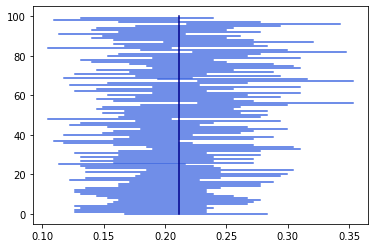

In [26]:
for i in range(100):
    plt.plot((Podatki200[i][2], Podatki200[i][3]), (i, i), "royalblue")
plt.plot((Delez, Delez), (0,100), "darkblue")
plt.savefig("IZ200.png")

E del naloge - Standardni odklon deležev vzorcev populacije, primerjaj s pravo standardno napako velikosti 200.

In [27]:
StandardniOdklon200 = Data200["Delez"].std(ddof=0)
StandardnaNapaka200 = math.sqrt((N-n)*Delez*(1 - Delez)/((n-1)*N))

In [28]:
StandardniOdklon200

0.02976487023321284

In [29]:
StandardnaNapaka200

0.028882816300147416

F del naloge - Naredi zgornji dve točki še za vzorec velikosti m = 800.

In [30]:
stevec800 = 0
for i in range(100):
    if Podatki800[i][2] <= Delez <= Podatki800[i][3]:
        stevec800 += 1
    else:
        stevec800 = stevec800

In [31]:
stevec800

97

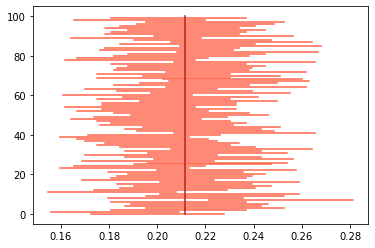

In [32]:
for i in range(100):
    plt.plot((Podatki800[i][2], Podatki800[i][3]), (i, i), "tomato")
plt.plot((Delez, Delez), (0,100),"firebrick")
plt.savefig("IZ800.png")

In [33]:
StandardniOdklon800 = Data800["Delez"].std(ddof=0)
StandardnaNapaka800 = math.sqrt((N-m)*Delez*(1 - Delez)/((m-1)*N))

In [34]:
StandardniOdklon800

0.014184471042305384

In [35]:
StandardnaNapaka800

0.01431494337534124